In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime

# Load the data
data = pd.read_csv('ny_data.csv')
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

# Prepare data for SARIMA
data = data[['PRCP', 'TMAX', 'SNOW', 'TMIN']]
data.columns = ['Precipitation', 'Max Temperature', 'Snow', 'Min Temperature']

# SARIMA Model
# SARIMA parameters: (p, d, q) = (1, 1, 1) and (P, D, Q, s) = (1, 1, 1, 12)
sarima_model = SARIMAX(data['Max Temperature'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()


/var/folders/b9/fkf035lj1y786gv5xh300_qc0000gn/T/ipykernel_21217/1319545578.py:6: DtypeWarning: Columns (7,11,17,23,31,33,35,37,39,41,43,45,47,49,51,53,55,65,67,69,71,73,75,77,79,81,83,85,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ny_data.csv')
/opt/miniconda3/envs/cs542/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/cs542/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.54702D+00    |proj g|=  5.97421D-02


 This problem is unconstrained.



At iterate    5    f=  3.40376D+00    |proj g|=  5.51691D-02

At iterate   10    f=  3.38433D+00    |proj g|=  3.40200D-03

At iterate   15    f=  3.37890D+00    |proj g|=  2.42537D-03

At iterate   20    f=  3.37792D+00    |proj g|=  1.07803D-03

At iterate   25    f=  3.37782D+00    |proj g|=  2.40461D-04

At iterate   30    f=  3.37782D+00    |proj g|=  4.85953D-04

At iterate   35    f=  3.37782D+00    |proj g|=  1.96854D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     50      1     0     0   1.177D-04   3.378D+00
  F =   3.3778164013208607     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/b9/fkf035lj1y786gv5xh300_qc0000gn/T/ipykernel_21217/1319545578.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_value = forecast.predicted_mean[0]


In [9]:

# Forecasting for 2024-03-05
future_date = datetime(2024, 2, 25)
forecast = sarima_result.get_forecast(steps=10)
forecast_value = forecast.predicted_mean[0]

print(f"Predicted Max Temperature for 2024-03-05: {forecast_value:.2f} degrees Celsius")


Predicted Max Temperature for 2024-03-05: 43.86 degrees Celsius


/var/folders/b9/fkf035lj1y786gv5xh300_qc0000gn/T/ipykernel_21217/3289754314.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_value = forecast.predicted_mean[0]


/var/folders/b9/fkf035lj1y786gv5xh300_qc0000gn/T/ipykernel_21217/2923324553.py:7: DtypeWarning: Columns (7,11,17,23,31,33,35,37,39,41,43,45,47,49,51,53,55,65,67,69,71,73,75,77,79,81,83,85,87,89) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ny_data.csv')
/opt/miniconda3/envs/cs542/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/cs542/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.54702D+00    |proj g|=  5.97421D-02

At iterate    5    f=  3.40376D+00    |proj g|=  5.51691D-02

At iterate   10    f=  3.38433D+00    |proj g|=  3.40200D-03

At iterate   15    f=  3.37890D+00    |proj g|=  2.42537D-03

At iterate   20    f=  3.37792D+00    |proj g|=  1.07803D-03

At iterate   25    f=  3.37782D+00    |proj g|=  2.40461D-04

At iterate   30    f=  3.37782D+00    |proj g|=  4.85953D-04

At iterate   35    f=  3.37782D+00    |proj g|=  1.96854D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/var/folders/b9/fkf035lj1y786gv5xh300_qc0000gn/T/ipykernel_21217/2923324553.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_value = forecast.predicted_mean[0]


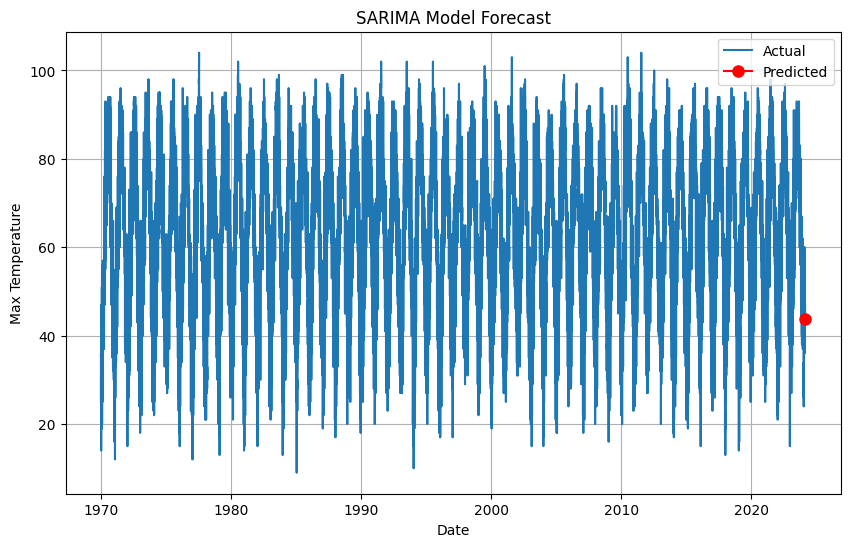

In [12]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('ny_data.csv')
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

# Prepare data for SARIMA
data = data[['PRCP', 'TMAX', 'SNOW', 'TMIN']]
data.columns = ['Precipitation', 'Max Temperature', 'Snow', 'Min Temperature']

# SARIMA Model
# SARIMA parameters: (p, d, q) = (1, 1, 1) and (P, D, Q, s) = (1, 1, 1, 12)
sarima_model = SARIMAX(data['Max Temperature'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecasting for 2024-03-05
future_date = datetime(2024, 3, 5)
forecast = sarima_result.get_forecast(steps=1)
forecast_value = forecast.predicted_mean[0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Max Temperature'], label='Actual')
plt.plot([future_date], [forecast_value], marker='o', markersize=8, color='red', label='Predicted')
plt.title('SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.legend()
plt.grid(True)
plt.show()
